In [2]:
import numpy as np 
import math as m
import matplotlib.pyplot as plt

def cel_to_kel(D):
    K = D + 273.15
    return K

def kel_to_cel(K):
    D = K - 273.15
    return D

def cal_to_joule(cal):
    J = cal * 4.184
    return J

# Useful constants

In [3]:
sigma = 5.67*10**(-8)

In [51]:
D = 0.16
d = 2*10**(-3)
L = 0.05
T_inf = cel_to_kel(27)
T_f = cel_to_kel(100)
k_aco = 14.9
k_cor = 0.039
h = 15


In [42]:
r0 = D/2-d
r1 = D/2
r2 = r1+10e-3

r = D/2 - d/2

print('r usado -> {} m'.format(r))

C1 = h*(T_f-T_inf)/(h * -np.log(r0/r1)+(k_aco/r1))
C2 = T_f - C1 * np.log(r0)

T = C1 * np.log(r) + C2
print('C1 = {:.4f}\nC2 = {:.4f}\nT({}) = {:.4f}'.format(C1,C2,r,T))

r usado -> 0.079 m
C1 = 5.8672
C2 = 388.1176
T(0.079) = 373.2247


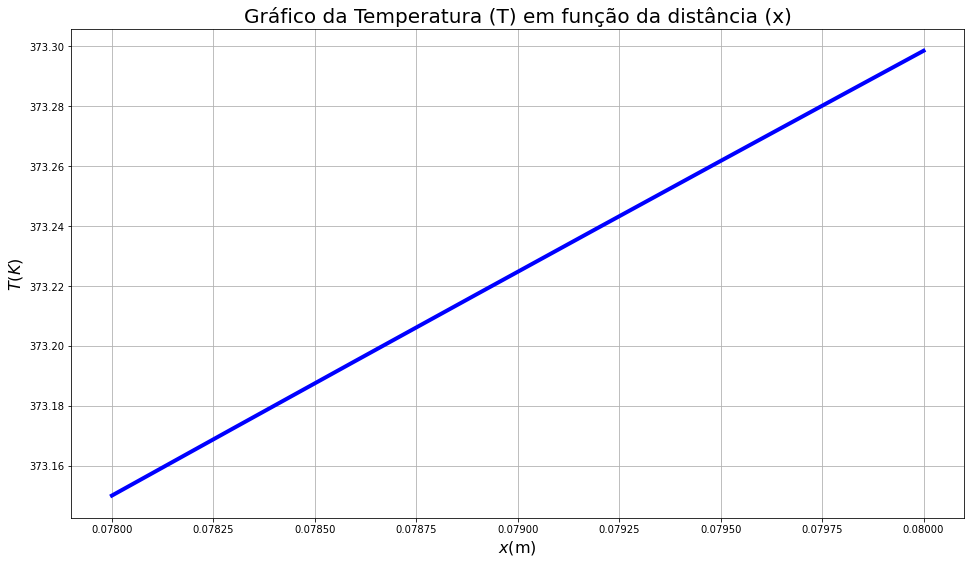

In [54]:
fig = plt.figure(figsize=[16,9])
ax = fig.subplots(1)
        
plot_eval = np.linspace(r0,r1,1000)

T = C1 * np.log(plot_eval) + C2

# Plot the Probability Distribuction Function (PDF)
ax.set_ylabel('$T(K)$',fontsize=16)
ax.set_xlabel('$x$(m)',fontsize=16)
ax.set_title('Gráfico da Temperatura (T) em função da distância (x)',fontsize=20)
        
ax.plot(plot_eval, T,'b', linewidth=4)
    
ax.grid()
        
plt.show()
fig.savefig('Temp_x_seminario_2.png', bbox_inches='tight')

In [52]:
R_tot = np.log(r1/r0)/(2*np.pi*k_aco*L) + np.log(r2/r1)/(2*np.pi*k_cor*L) + 1/(2*np.pi*h*r2*L)
print('Resistência total: {:.4f} K/W'.format(R_tot))

fx_q_r = (T_f-T_inf)/(R_tot*2*np.pi*r2*L)
print('fluxo de ralor: {:.2f} W/m^2'.format(fx_q_r))

Resistência total: 11.9765 K/W
fluxo de ralor: 215.58 W/m^2
